In [34]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [35]:
img = plt.imread("butterFly.gif")

Add gaussian noise

In [36]:
def add_gaussian_noise(img):
    mean = 0.5
    stdev = 10
    noise = np.random.normal(mean, stdev, img.shape).astype(np.uint8)
    noisy_img = cv.add(img, noise)
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img


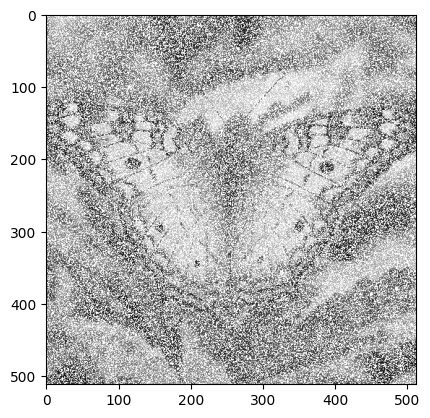

In [37]:
noisey_image = add_gaussian_noise(img)
plt.imshow(noisey_image, cmap = "gray")
plt.show()

4(a). Apply 4th order Butterworth and Gaussian low pass filter to analyze their performance quantitatively

Transfer the image into frequency domain


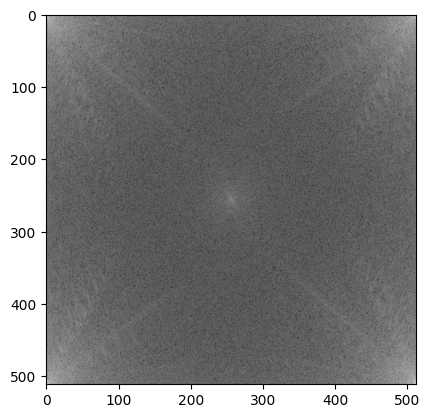

In [38]:
frequency_domain_pic = np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(frequency_domain_pic)), cmap = 'gray')
plt.axis()
plt.show()

show the frequency domain image

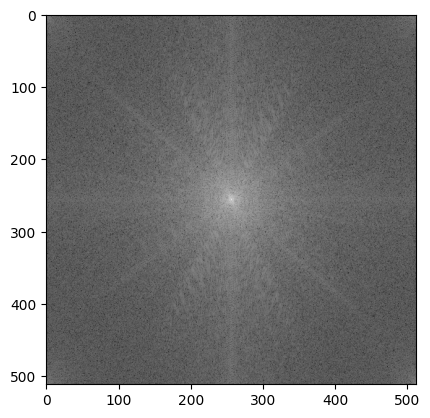

In [39]:
frequency_domain_pic =  np.fft.fftshift(frequency_domain_pic)
plt.imshow(np.log1p(np.abs(frequency_domain_pic)), cmap = 'gray')
plt.axis()
plt.show()

Butterworth low pass filter :

In [40]:
def butter_worth_lowpass_filter(image, order, cut_off_frequency):
    height, width = image.shape
    filter = np.zeros(image.shape, dtype = np.float32)

    frequency_domain_pic = np.fft.fft2(image)
    frequency_domain_pic = np.fft.fftshift(frequency_domain_pic)
    n = order
    d0 = cut_off_frequency

    for i in range(height):
        for j in range(width):
            d = np.sqrt((i - height / 2) ** 2 + (j - width / 2) ** 2)
            filter[i, j] = 1 / (1 + (d0 / d) ** (2 * n))
    
    filtered_image = frequency_domain_pic * filter

    filtered_image = np.fft.fftshift(filtered_image)
    filtered_image = np.abs(np.fft.ifft2(filtered_image))

    return filtered_image


Gaussian low pass filter

In [41]:
def gaussian_low_pass_filter(image, cut_off_frequency):
    height, width = image.shape
    filter = np.zeros(image.shape, dtype = np.float32)

    frequency_domain_pic = np.fft.fft2(image)
    frequency_domain_pic = np.fft.fftshift(frequency_domain_pic)
    d0 = cut_off_frequency

    for i in range(height):
        for j in range(width):
            d = np.sqrt((i - height / 2) ** 2 + (j - width / 2) ** 2)
            filter[i, j] = np.exp(-(d ** 2) / (2 * d0 ** 2)) 
    
    filtered_image = frequency_domain_pic * filter

    filtered_image = np.fft.fftshift(filtered_image)
    filtered_image = np.abs(np.fft.ifft2(filtered_image))
    
    return filtered_image

ideal low pass filter : 

In [43]:
def ideal_low_pass_filter(image , cut_off_frequency):
    height, width = image.shape
    my_filter  = np.zeros(image.shape, dtype=np.float32)

    frequncy_domain_image = np.fft.fft2(image)
    frequncy_domain_image = np.fft.fftshift(frequncy_domain_image)
    d0 = cut_off_frequency


    for i in range(height):
        for j in range(width):
            d = np.sqrt((i-height/2)**2 + (j-width/2)**2)
            my_filter[i, j] = d <= d0

    filtered_image = frequncy_domain_image * my_filter

    filtered_image = np.fft.fftshift(filtered_image)
    filtered_image = np.abs(np.fft.ifft2(filtered_image))

    return filtered_image

C:\Users\Dell\AppData\Local\Temp\ipykernel_9564\598331279.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  filter[i, j] = 1 / (1 + (d0 / d) ** (2 * n))


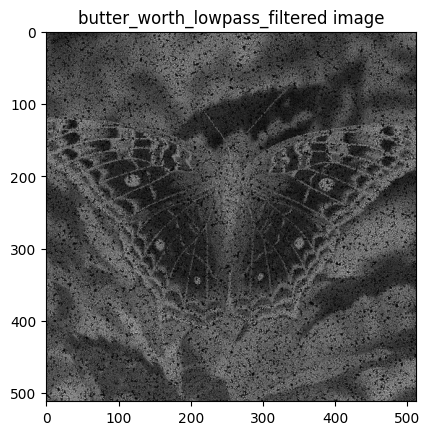

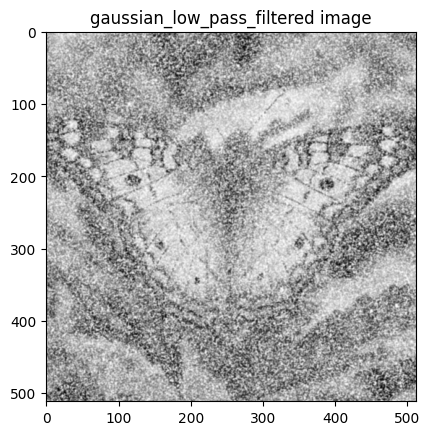

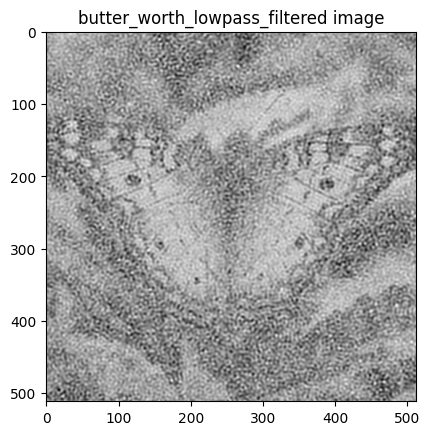

In [45]:
butter = butter_worth_lowpass_filter(noisey_image, 4, 100)
gauss = gaussian_low_pass_filter(noisey_image, 100)
ideal = ideal_low_pass_filter(noisey_image, 100)

plt.imshow(butter, cmap = 'gray')
plt.title("butter_worth_lowpass_filtered image")
plt.show()
plt.imshow(gauss, cmap = 'gray')
plt.title("gaussian_low_pass_filtered image")
plt.show()
plt.imshow(ideal, cmap = 'gray')
plt.title("butter_worth_lowpass_filtered image")
plt.show()